[[1.         0.81806436]
 [0.81806436 1.        ]]


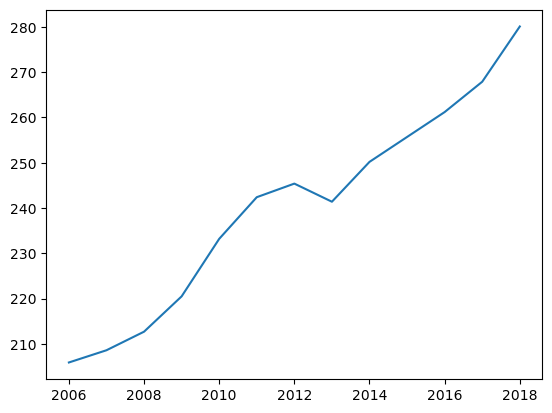

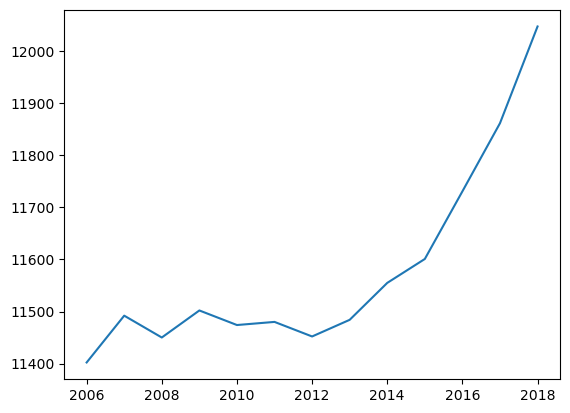

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(file_name):
    """
    First, opens the file.
    Then, skips the non-data in the first line.
    It returns a list of data.
    """
    input_file = open(file_name, 'r')
    count_line = 0
    years = []
    WOs = []
    beer_consumptions = []

    for line in input_file:
        count_line += 1
        if count_line > 1:
            split_data = line.split(';')
            year = int(split_data[0])
            years.append(year)
            WO = float(split_data[1].replace(',','.'))
            WOs.append(WO)
            beer_consumption = int(split_data[2])
            beer_consumptions.append(beer_consumption)
            

    input_file.close()
    return years, WOs, beer_consumptions

years, WOs, beer_consumptions = read_data("istherecorrelation.csv")

correlation = np.corrcoef(WOs,beer_consumptions)
print(correlation)
plt.plot(years, WOs)
plt.show()

plt.plot(years, beer_consumptions)
plt.show()

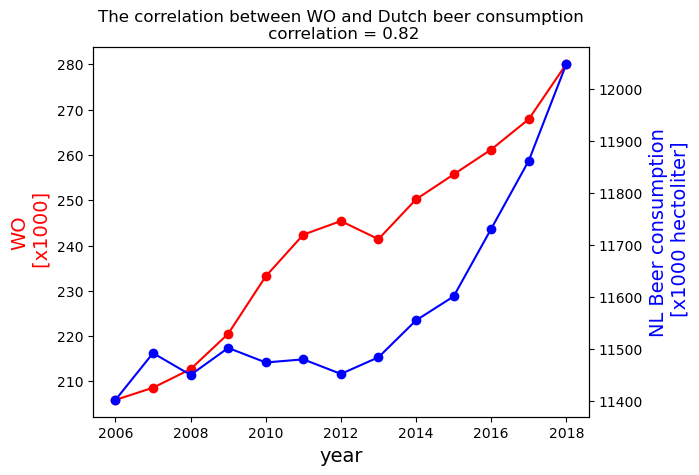

In [12]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(years,
        WOs,
        color="red", 
        marker="o")
# set x-axis label
ax.set_xlabel("year", fontsize = 14)

# set y-axis label
ax.set_ylabel("WO\n [x1000]",
              color="red",
              fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(years, beer_consumptions,color="blue",marker="o")
ax2.set_ylabel("NL Beer consumption\n [x1000 hectoliter]",color="blue",fontsize=14)
plt.title(f"The correlation between WO and Dutch beer consumption\n correlation = {round(correlation[0][1], 2)}")
plt.show()

fig.savefig('The correlation between WO and Dutch beer consumption.jpg',
            format='jpeg',
            dpi=300,
            bbox_inches='tight')
